In [2]:
# Import the pandas library, which is the primary tool for working with data in Python
import pandas as pd

# Define the file name. Since the notebook is in the same folder as the CSV, we just need the name.
file_name = 'globalterrorismdb_0718dist.csv'

# Use a try-except block to handle potential errors, like if the file isn't found.
try:
    # Read the CSV file into a pandas DataFrame.
    # A DataFrame is like a smart spreadsheet table in Python.
    # We use encoding='ISO-8859-1' because this specific file has unusual characters
    # that standard encoding (UTF-8) can't read.
    raw_df = pd.read_csv(file_name, encoding='ISO-8859-1')
    
    print("✅ Success! The dataset has been loaded into a DataFrame.")
    
except FileNotFoundError:
    print(f"Error: The file '{file_name}' was not found.")
    print("Please make sure the CSV file is in the same folder as this notebook.")

C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\1337258122.py:13: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv(file_name, encoding='ISO-8859-1')


✅ Success! The dataset has been loaded into a DataFrame.


In [3]:
# .shape shows you the number of (rows, columns)
print(f"The dataset has {raw_df.shape[0]} rows and {raw_df.shape[1]} columns.")

The dataset has 181691 rows and 135 columns.


In [4]:
# .head() displays the first 5 rows of the DataFrame
raw_df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


In [5]:
# .info() provides a concise summary of the DataFrame
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [9]:
# Create a new DataFrame with only the most relevant columns.
# This makes our dataset much easier to manage.
df = raw_df[['iyear', 'imonth', 'iday', 'country_txt', 'region_txt', 'provstate', 'city',
             'attacktype1_txt', 'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound']].copy()

# Display the first 5 rows of our new, smaller DataFrame to see the result.
df.head()

,iyear,imonth,iday,country_txt,region_txt,provstate,city,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,nwound
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN


In [10]:
# Create a dictionary to map the old, cryptic names to new, clear names.
column_mapping = {
    'iyear': 'Year',
    'imonth': 'Month',
    'iday': 'Day',
    'country_txt': 'Country',
    'region_txt': 'Region',
    'provstate': 'State',
    'city': 'City',
    'attacktype1_txt': 'AttackType',
    'targtype1_txt': 'TargetType',
    'weaptype1_txt': 'WeaponType',
    'nkill': 'Killed',
    'nwound': 'Wounded'
}

# Use the .rename() method to apply the new names to our DataFrame.
# The 'inplace=True' argument modifies our DataFrame directly without needing to reassign it.
df.rename(columns=column_mapping, inplace=True)

# Check the result.
df.head()

,Year,Month,Day,Country,Region,State,City,AttackType,TargetType,WeaponType,Killed,Wounded
0,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,0.0
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,0.0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,1.0,0.0
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,NaN
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,NaN


In [11]:
# For numerical columns, filling missing values with 0 is a reasonable choice.
# We assume that if data is missing, it means zero people were hurt or killed.
df['Killed'] = df['Killed'].fillna(0)
df['Wounded'] = df['Wounded'].fillna(0)

# For text-based columns, we can fill missing values with a placeholder string.
df['City'] = df['City'].fillna('Unknown')
df['State'] = df['State'].fillna('Unknown')

# Let's check the number of null values in each column now to confirm our cleaning.
df.isnull().sum()

Year          0
Month         0
Day           0
Country       0
Region        0
State         0
City          0
AttackType    0
TargetType    0
WeaponType    0
Killed        0
Wounded       0
dtype: int64

In [12]:
# First, let's ensure our numeric columns have the correct integer data type.
df['Killed'] = df['Killed'].astype(int)
df['Wounded'] = df['Wounded'].astype(int)

# Create a 'Casualties' column by adding the 'Killed' and 'Wounded' columns.
# This gives us the total impact of an attack in a single number.
df['Casualties'] = df['Killed'] + df['Wounded']

# Let's look at the first few rows of our DataFrame with the new 'Casualties' column.
# We'll also check the data types to make sure 'Casualties' is an integer.
print("DataFrame with new 'Casualties' column:")
df.head()

DataFrame with new 'Casualties' column:


,Year,Month,Day,Country,Region,State,City,AttackType,TargetType,WeaponType,Killed,Wounded,Casualties
0,1970,7,2,Dominican Republic,Central America & Caribbean,Unknown,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1,0,1
1,1970,0,0,Mexico,North America,Federal,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0,0,0
2,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,Assassination,Journalists & Media,Unknown,1,0,1
3,1970,1,0,Greece,Western Europe,Attica,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,0,0,0
4,1970,1,0,Japan,East Asia,Fukouka,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,0,0,0


In [13]:
# Display the final summary of our cleaned and transformed DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Year        181691 non-null  int64 
 1   Month       181691 non-null  int64 
 2   Day         181691 non-null  int64 
 3   Country     181691 non-null  object
 4   Region      181691 non-null  object
 5   State       181691 non-null  object
 6   City        181691 non-null  object
 7   AttackType  181691 non-null  object
 8   TargetType  181691 non-null  object
 9   WeaponType  181691 non-null  object
 10  Killed      181691 non-null  int64 
 11  Wounded     181691 non-null  int64 
 12  Casualties  181691 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 18.0+ MB


In [14]:
# Define the name for your clean output file
clean_file_path = 'global_terrorism_cleaned.csv'

# Save the cleaned DataFrame to a new CSV file
# We use index=False to prevent pandas from writing the DataFrame index as a column
df.to_csv(clean_file_path, index=False)

print(f"✅ Success! Your clean data has been saved to '{clean_file_path}'")

✅ Success! Your clean data has been saved to 'global_terrorism_cleaned.csv'


In [15]:
# Import matplotlib.pyplot, which is the main plotting tool. We give it the short name 'plt'.
import matplotlib.pyplot as plt

# Import seaborn, which is built on top of matplotlib and makes our charts look much nicer and easier to create. We give it the short name 'sns'.
import seaborn as sns

# This command just sets a nice visual style for all the plots we're about to make.
sns.set_style('whitegrid')

print("Plotting libraries are ready!")

Plotting libraries are ready!


C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\473686623.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Year', data=df, palette='rocket')


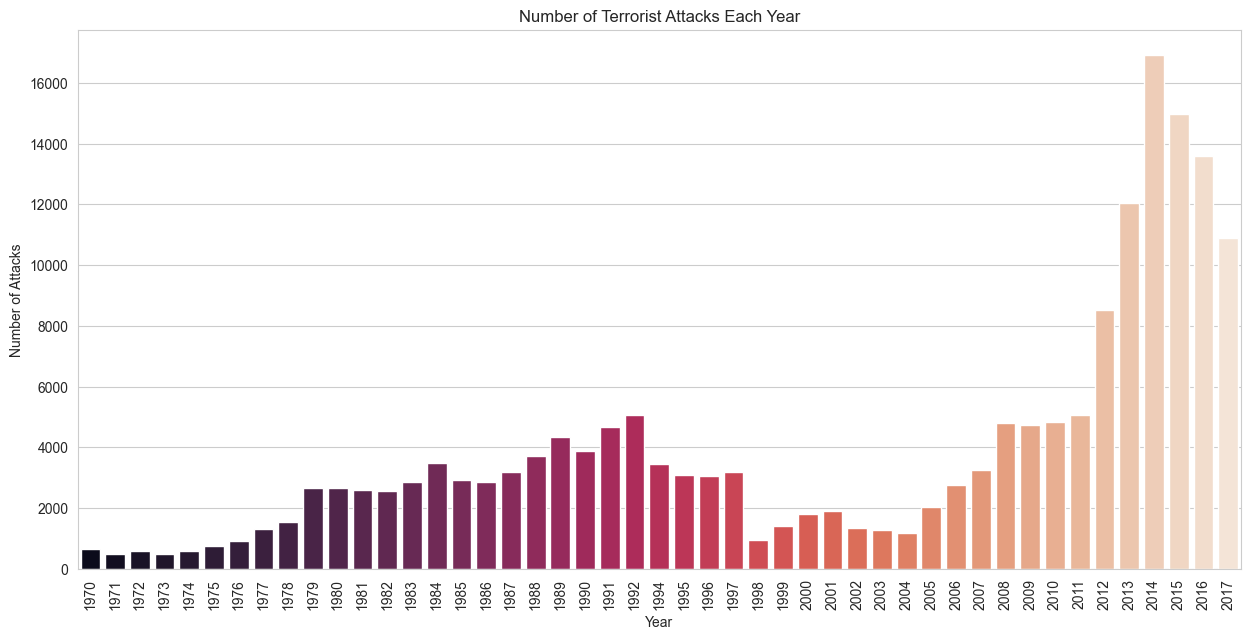

In [16]:
# 1. Create a blank canvas for our plot. figsize makes it wide and tall enough to read.
plt.figure(figsize=(15, 7))

# 2. Tell seaborn to create a count plot. This type of plot automatically counts values for you.
#    x='Year': We want the years along the bottom (x-axis).
#    data=df: Use the data from our clean DataFrame.
#    palette='rocket': This just picks a nice color scheme.
sns.countplot(x='Year', data=df, palette='rocket')

# 3. Rotate the labels on the x-axis so they don't overlap.
plt.xticks(rotation=90)

# 4. Add a title and labels to make the chart easy to understand.
plt.title('Number of Terrorist Attacks Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')

# 5. Show the final plot.
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\1976804097.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.index, y=top_countries.values, palette='mako')


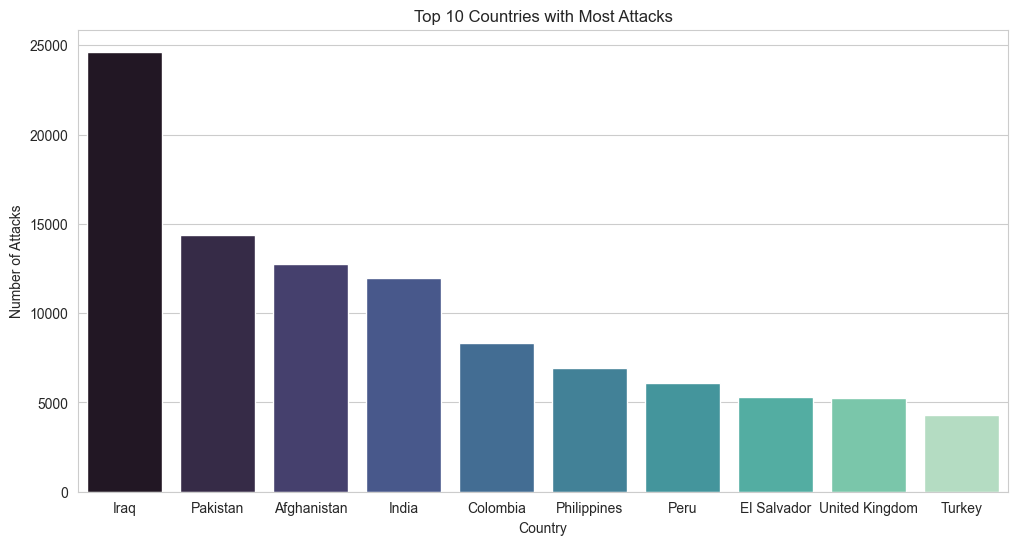

In [17]:
# --- Data Preparation Step ---
# 1. Count the attacks for each country.
# 2. Use .head(10) to select only the top 10 from the list.
# 3. Store this top-10 list in a new variable called 'top_countries'.
top_countries = df['Country'].value_counts().head(10)


# --- Visualization Step ---
# 1. Create a blank canvas for the plot.
plt.figure(figsize=(12, 6))

# 2. Tell seaborn to create a bar plot.
#    x=top_countries.index: The x-axis should be the country names (the 'index').
#    y=top_countries.values: The y-axis (the height of the bars) should be the counts (the 'values').
sns.barplot(x=top_countries.index, y=top_countries.values, palette='mako')

# 3. Add a title and labels.
plt.title('Top 10 Countries with Most Attacks')
plt.xlabel('Country')
plt.ylabel('Number of Attacks')

# 4. Show the final plot.
plt.show()

In [18]:
# Create a new DataFrame named 'india_df' that contains only Indian attack data.
# We use .copy() to ensure it's an independent DataFrame.
india_df = df[df['Country'] == 'India'].copy()

# (Optional) You can check the first few rows to confirm it worked.
# print("Preview of India-only data:")
# india_df.head()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\1237024804.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_indian_states.index, y=top_indian_states.values, palette='viridis')


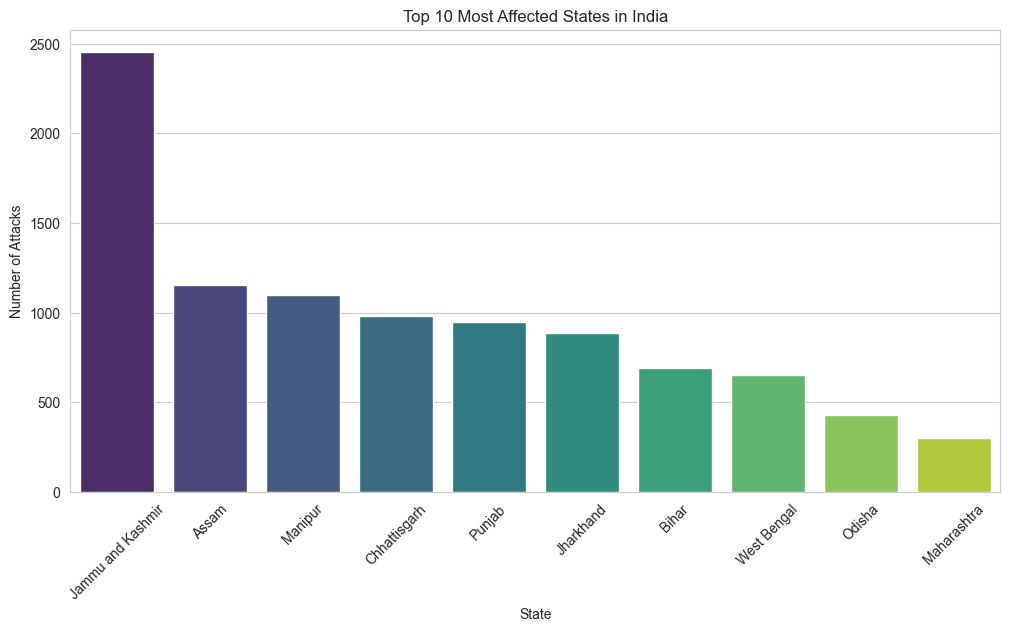

In [19]:
# --- Data Preparation ---
# Count the number of attacks for each state within the 'india_df' and select the top 10.
top_indian_states = india_df['State'].value_counts().head(10)


# --- Visualization ---
# Create a blank canvas for the plot.
plt.figure(figsize=(12, 6))

# Create the bar plot using our top 10 states data.
sns.barplot(x=top_indian_states.index, y=top_indian_states.values, palette='viridis')

# Add titles and labels for clarity.
plt.title('Top 10 Most Affected States in India')
plt.xlabel('State')
plt.ylabel('Number of Attacks')
# Rotate the state names on the x-axis for better readability.
plt.xticks(rotation=45) 

# Show the final plot.
plt.show()

In [20]:
# Use the value_counts() method to count attacks for each year in the India DataFrame.
attack_counts_by_year = india_df['Year'].value_counts()

# Use the idxmax() method to get the year (the index) with the highest count.
year_with_most_attacks = attack_counts_by_year.idxmax()

# Get the actual number of attacks for that year using .max()
max_attack_count = attack_counts_by_year.max()

print(f"The year with the most attacks in India was: {year_with_most_attacks}")
print(f"Number of attacks in that year: {max_attack_count}")

The year with the most attacks in India was: 2016
Number of attacks in that year: 1025


C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\2932599436.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Month_Name', data=df, order=month_order, palette='cividis')


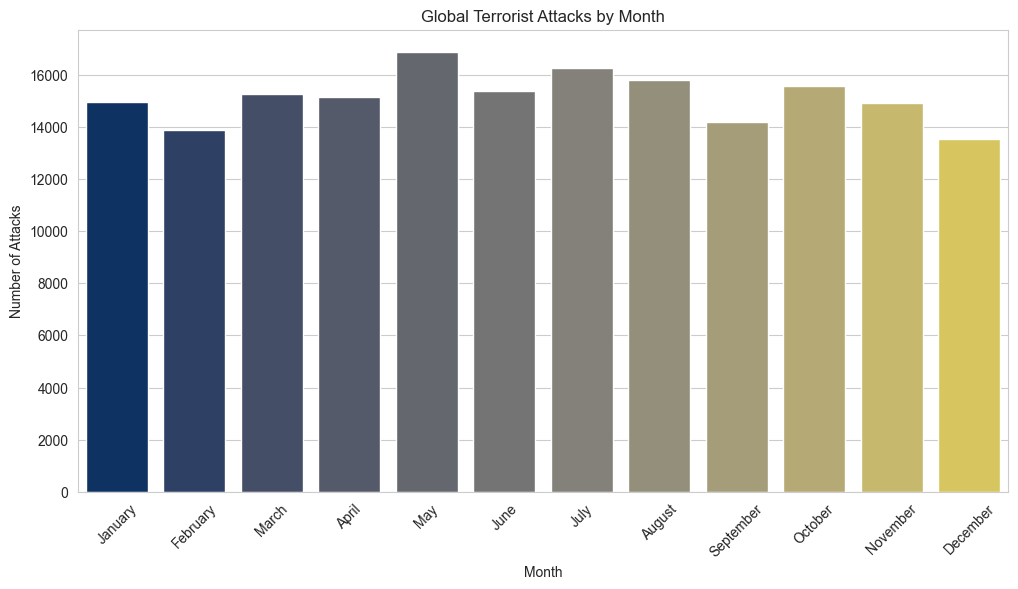

In [21]:
# --- Data Preparation ---
# We want the months to be in order, not alphabetical.
# First, we create a list of month names in calendar order.
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 
               'August', 'September', 'October', 'November', 'December']

# We will temporarily use the 'Month' number to help with sorting.
df['Month_Name'] = df['Month'].apply(lambda x: month_order[x-1])


# --- Visualization ---
plt.figure(figsize=(12, 6))

# Create a count plot of attacks by month name.
# The 'order' parameter ensures the x-axis is sorted chronologically.
sns.countplot(x='Month_Name', data=df, order=month_order, palette='cividis')

plt.title('Global Terrorist Attacks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_10980\3843016114.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_weapons.index, y=top_weapons.values, palette='inferno')


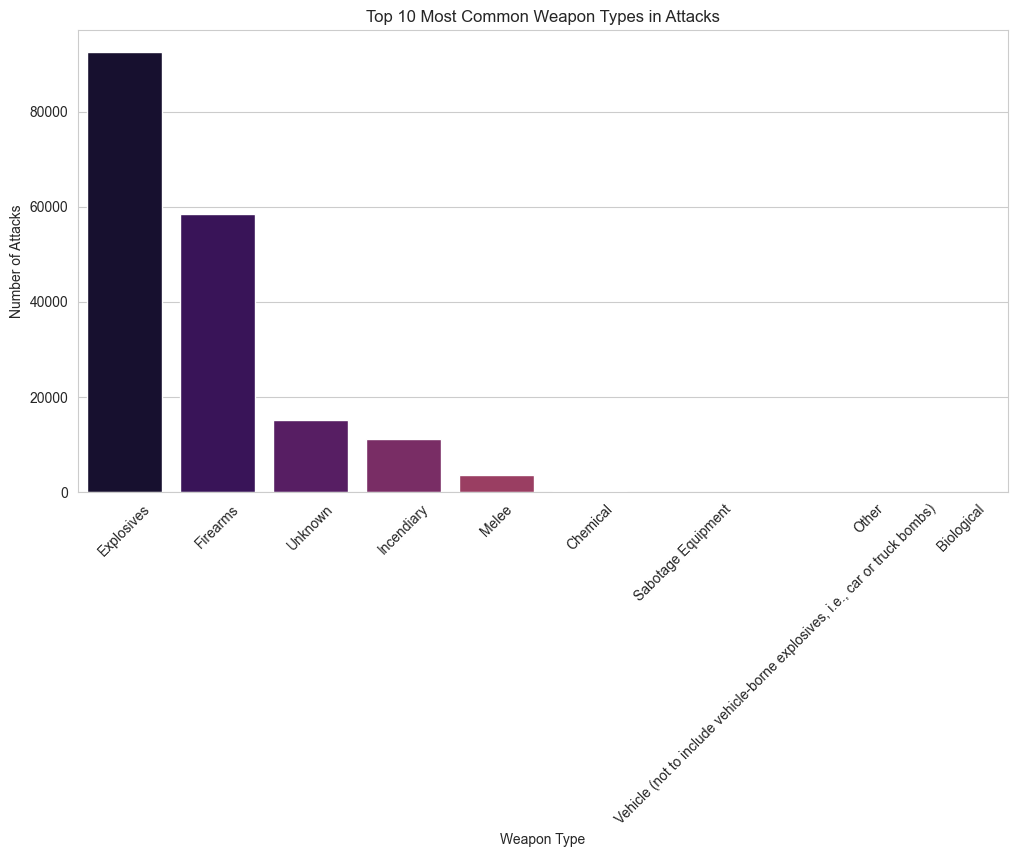

In [22]:
plt.figure(figsize=(12, 6))

# Count the occurrences of each weapon type and select the top 10.
top_weapons = df['WeaponType'].value_counts().head(10)

sns.barplot(x=top_weapons.index, y=top_weapons.values, palette='inferno')

plt.title('Top 10 Most Common Weapon Types in Attacks')
plt.xlabel('Weapon Type')
plt.ylabel('Number of Attacks')
plt.xticks(rotation=45)
plt.show()

In [23]:
import folium

# --- Data Preparation ---
# We need to use the original raw_df to get the latitude and longitude columns.
# We will merge this location data into our clean 'india_df'.
india_locations = raw_df[['eventid', 'latitude', 'longitude']]
india_df_full = pd.merge(india_df, india_locations, left_index=True, right_index=True)

# Drop rows where location data is missing.
india_df_full.dropna(subset=['latitude', 'longitude'], inplace=True)

# To keep the map from being too cluttered and slow, we'll plot a random sample of 500 attacks.
# The 'random_state' makes sure you get the same random sample every time.
map_data = india_df_full.sample(n=500, random_state=42)


# --- Map Visualization ---
# 1. Create a base map, centered on India.
#    'location' is set to the rough center of India.
#    'zoom_start' sets the initial zoom level.
india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=5)

# 2. Add a point (a CircleMarker) to the map for each attack in our sample data.
for index, row in map_data.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=3,             # Size of the circle
        color='red',          # Color of the circle
        fill=True,
        fill_color='darkred',
        # Popup shows the city and state when you click the circle
        popup=f"City: {row['City']}, State: {row['State']}" 
    ).add_to(india_map)

# 3. Save the map to an HTML file.
india_map.save('india_attack_map.html')

print("✅ Success! Your interactive map has been saved as 'india_attack_map.html'")
print("Open this file in your web browser to see the map.")

✅ Success! Your interactive map has been saved as 'india_attack_map.html'
Open this file in your web browser to see the map.
